In [66]:
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

In [67]:
w = 5e-8

In [68]:
x = np.linspace(-w,w,1000)


We write cosine in terms of a taylor series about 0 (using mpmath). This way we can improve on the precision of how cosine is computed. Alternatively one can also use a Chebyshev series, this is known to converge much faster than the taylor series on the interval [-1,1].

We also increase the floating point precision in terms of the dps (in short for decimal places). We can thus compute the function for much smaller values.

In [69]:
mp.dps = 17
p = taylor(cos, 0,10)
y1 = (1-polyval(p[::-1],x))/x**2
mp.dps = 19
y2 = (1-polyval(p[::-1],x))/x**2
mp.dps = 21
y3 = (1-polyval(p[::-1],x))/x**2

In [70]:

z = (1 - np.cos(x))/x**2

In [72]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True,
                       figsize=(20, 10))
ax[0].plot(x,y1)
ax[0].title.set_text('y(x) - dps 17')
ax[1].plot(x,y2)
ax[1].title.set_text('y(x) - dps 19')
ax[2].plot(x,y3)
ax[2].title.set_text('y(x) - dps 21')
plt.xlim(-w,w)
plt.ylim(-0.1, 1.1)

(-0.1, 1.1)

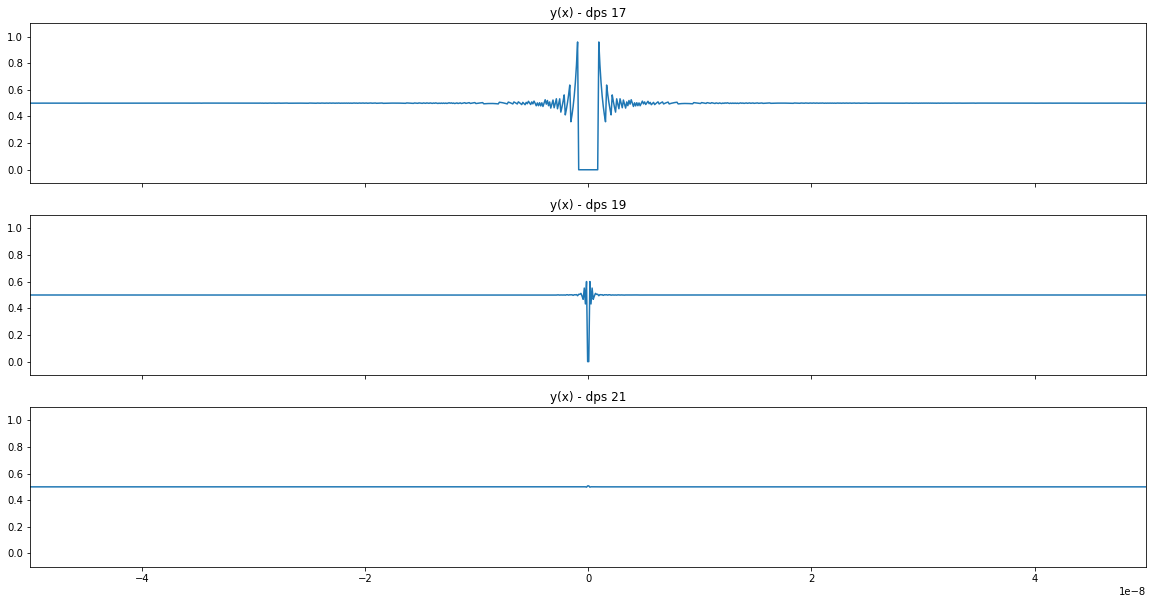

In [73]:
plt.show()

As the floating point precision is increased the function is converging to it's actual limit 1/2 . the oscillating part of the function is where the computations start to reach an error and the 0 part is where the function tries to divide by zero but is ignored. It is also worth observing that one can never get rid of the discontinuety. Instead we can just imporve on how the function is computed by expanding cosine in terms of a taylor series and improving the floating point errors.